In [ ]:
%pip install neupy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as mh

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.svm import SVC
import random as rd

#from neupy.algorithms import PNN, GRNN

In [ ]:
class Ellipse(object):
    def __init__(self, a, b, alpha = 0, x0 = 0, y0 = 0):
        self.a = a
        self.b = b
        self.alpha = alpha
        self.x0 = x0
        self.y0 = y0
        self.x, self.y = np.array([]), np.array([])
        self.dim = 0
        
    def f(self, t):
        x = self.a * np.cos(t)
        y = self.b * np.sin(t)
        return x * mh.cos(self.alpha) + y * mh.sin(self.alpha) - self.x0
    
    def g(self, t):
        x = self.a * np.cos(t)
        y = self.b * np.sin(t)
        return - x * mh.sin(self.alpha) + y * mh.cos(self.alpha) - self.y0

    def points_gen(self, start, stop, step):
        t = np.arange(start, stop, step)
        self.x = self.f(t)
        self.y = self.g(t)
        self.dim = np.size(t)

    def show(self, color='blue'):
        print('OK')
        
        
        plt.plot(self.x, self.y, color=color)
        plt.title('Эллипс')
        plt.ylabel('x')
        plt.xlabel('y')
        plt.grid()
        plt.show()

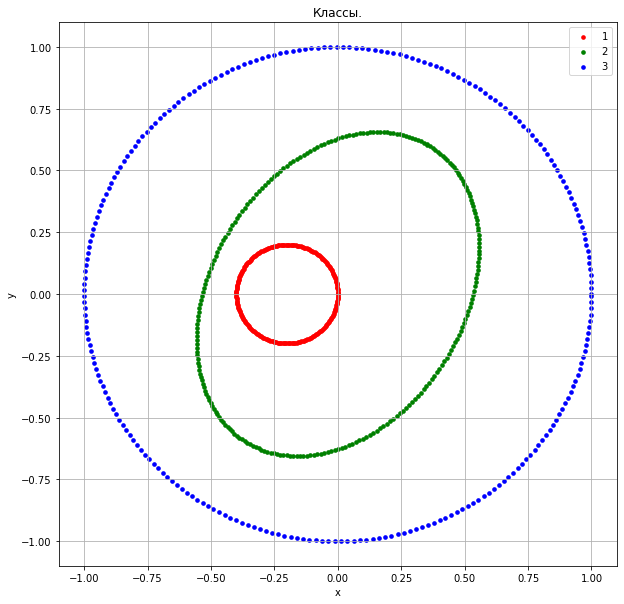

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
start = 0
step = 0.025
stop = 2 * mh.pi

a, b, alpha, x0 = 0.2, 0.2, 0, 0.2
line1 = Ellipse(a, b, alpha,x0)
line1.points_gen(start, stop, step)

a, b, alpha, x0 = 0.7, 0.5, -mh.pi/ 3, 0
line2 = Ellipse(a, b, alpha)
line2.points_gen(start, stop, step)

a, b, = 1, 1
line3 = Ellipse(a, b)
line3.points_gen(start, stop, step)

plt.scatter(line1.x, line1.y, color='r', linewidth=2, s=7)
plt.scatter(line2.x, line2.y, color='g', linewidth=2, s=7)
plt.scatter(line3.x, line3.y, color='b', linewidth=2, s=7)

plt.title('Классы.')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['1', '2', '3'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
r = np.array([[line1.x[i], line1.y[i]] for i in np.random.permutation(line1.dim)[:100]])
g = np.array([[line2.x[i], line2.y[i]] for i in np.random.permutation(line2.dim)[:100]])
b = np.array([[line3.x[i], line3.y[i]] for i in np.random.permutation(line3.dim)[:100]])

np.random.shuffle(r)
np.random.shuffle(g)
np.random.shuffle(b)

r_train, r_test = np.array_split(r, [ int( 0.8 * np.shape(r)[0])])
g_train, g_test = np.array_split(g, [ int( 0.8 * np.shape(g)[0])])
b_train, b_test = np.array_split(b, [ int( 0.8 * np.shape(b)[0])])

In [ ]:
def data_gen(r, g, b):
    #train_X, train_Y = np.empty((0,2)), np.empty((0,3))
    X, Y = [], []
    classes = np.vstack((r, g, b))
    np.random.shuffle(classes)

    for i in classes:
        j = list(i)
        
        if j in X:
            continue
        #t = np.zeros(3)
        t = [0, 0, 0]
        if i in r:
            t[0] += 1
        if i in g:
            t[1] += 1
        if i in b:
            t[2] += 1
        #train_X = np.append(train_X, [i], axis=0)
        X.append(j)
        #train_Y = np.append(train_Y, [t], axis=0)
        Y.append(t)
    return np.array(X), np.array(Y)

In [ ]:
train_X, train_Y = data_gen(r_train, g_train, b_train)
test_X, test_Y = data_gen(r_test, g_test, b_test)

In [ ]:
class RBF(object):
    def __init__(self, neurons1, neurons2, const_weights):
        self.layers = 2
        self.neurons = np.array([neurons1, neurons2])
        if neurons1 > 1:
            self.weights = np.array([const_weights.transpose(), np.array([[rd.random() for i in range(neurons1)] for j in range(neurons2)]).transpose()])
            self.beta = np.array([rd.random() for i in range(neurons2)])
        else:
            self.weights = np.array([const_weights.transpose(), np.array([rd.random() for i in range(neurons1)]).transpose()])
            self.beta = rd.random()
    def show(self):
        print("The network consists of:")
        print("\t ", self.layers, "hidden layer with ", self.neurons[0], " neuron(s), out layer with ", self.neurons[1], " neuron(s).")
        print("Hidden layer constant weights: ")
        print(self.weights[0])
        print("Out layer weights: ")
        print(self.weights[1])

In [ ]:
const_weights = np.vstack((r, g, b))
n1 = np.shape(const_weights)[0]
n2 = 3

rbf = RBF(n1, n2, const_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
def gaussian(x):
    return np.exp(-x)

def dist_count(x, weights):
    if np.shape(weights)[0] == 2:
        return np.array([ (cx - x[0])**2 + (cy - x[1])**2 for cx, cy in zip(weights[0,:], weights[1,:])])
    else:
        return np.array([ (cx - x[0])**2 for cx in weights[0,:]])

def predict(self, X):
    dist = np.array([gaussian(dist_count(x, self.weights[0])) for x in X])
    out = np.array([ d.dot(self.weights[1]) + self.beta for d in dist])
    return out

def multi_loss(out, T):
    return np.sum(np.sum((T - out)**2, axis=1)) / np.shape(T)[0]

In [ ]:
def multi_train(self, D, X, Y, learning_rate, epochs):
    eps = 1e-5
    mse = 1
    mses = []
    
    for i in range(epochs):
        if mse <= eps:
            break
        for x, y, dist in zip(X, Y, D):
            #dist = dist_count(p, self.weights[0])
            out = dist.dot(self.weights[1]) + self.beta
            e = y - out
            #print(e)
            #print(np.shape(self.weights[1]))
            if e.all() == 0:
                continue
            self.weights[1] += np.array([[ i * j for j in e] for i in dist]) * learning_rate
            self.beta += e * learning_rate
        mse = multi_loss(predict(self, X), Y)
        print("Epoch: ", i + 1, " mse: ", mse)
        mses.append(mse)
        #print(mses)
    return mses

In [ ]:
dist = np.array([gaussian(dist_count(x, rbf.weights[0])) for x in train_X])

mses = multi_train(rbf, dist, train_X, train_Y, 5 * 1e-4, 800)


Epoch:  1  mse:  14.569446032317753
Epoch:  2  mse:  8.437276258411396
Epoch:  3  mse:  6.108723816078902
Epoch:  4  mse:  4.93472359184504
Epoch:  5  mse:  4.165260932447547
Epoch:  6  mse:  3.57657933318525
Epoch:  7  mse:  3.0948512955943053
Epoch:  8  mse:  2.6905167072999494
Epoch:  9  mse:  2.3480062468006837
Epoch:  10  mse:  2.056857634667873
Epoch:  11  mse:  1.808991020687335
Epoch:  12  mse:  1.5977845458146307
Epoch:  13  mse:  1.4176905641196715
Epoch:  14  mse:  1.2640254057538023
Epoch:  15  mse:  1.1328240616523138
Epoch:  16  mse:  1.0207263411240355
Epoch:  17  mse:  0.9248830427602436
Epoch:  18  mse:  0.8428772410591532
Epoch:  19  mse:  0.7726578826072302
Epoch:  20  mse:  0.7124836759899263
Epoch:  21  mse:  0.6608756592732483
Epoch:  22  mse:  0.6165770972256998
Epoch:  23  mse:  0.5785195713807811
Epoch:  24  mse:  0.5457943017918364
Epoch:  25  mse:  0.5176278880724239
Epoch:  26  mse:  0.4933617834515831
Epoch:  27  mse:  0.4724349224013757
Epoch:  28  mse:  0

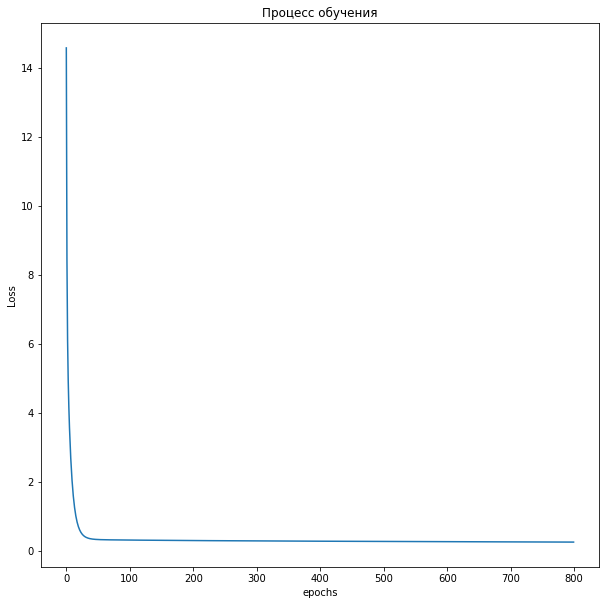

In [ ]:
plt.plot(np.array(mses))
plt.title('Процесс обучения')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.show()

In [ ]:
image = np.empty((0, 2))
n = np.arange(-1.1, 1.1, 0.025)
for i in n:
    for j in n:
        image = np.vstack((image, np.array([i, j])))

In [ ]:
preds = predict(rbf, image)
p = np.round(preds, 1)

dimp = int(np.shape(p)[0] ** 0.5)
matrix = np.array( [ [ p[j * dimp + i] for i in range(dimp) ] for j in range(dimp) ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


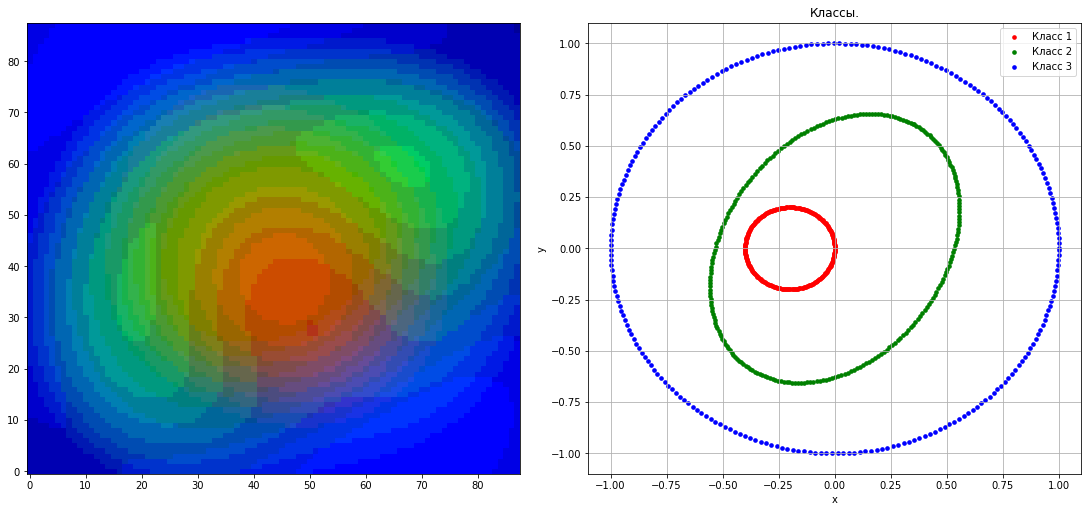

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), constrained_layout=True)
p1 = axes[0].imshow(matrix, aspect='auto', origin="lower")

plt.scatter(line1.x, line1.y, color='r', linewidth=2, s=7)
plt.scatter(line2.x, line2.y, color='g', linewidth=2, s=7)
plt.scatter(line3.x, line3.y, color='b', linewidth=2, s=7)


plt.title('Классы.')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['Класс 1', 'Класс 2', 'Класс 3'], loc='upper right')
plt.grid()
plt.show()

### II. Обобщенно-регрессионная нейронная сеть для аппроксимации функции. Проверка работы сети с рыхлыми данными.


In [ ]:
def x(t):
    return np.sin(t**2 - 7 * t)
a, b, h = 0, 5, 0.025
T = np.vstack(np.arange(a, b, h))
X = x(T)

In [ ]:
train_T, test_T =  np.array_split(T, [ int( 0.9 * np.shape(T)[0])])
train_X, test_X =  np.array_split(X, [ int( 0.9 * np.shape(X)[0])])

train_T, test_T = np.vstack(train_T), np.vstack(test_T)
train_X, test_X = np.vstack(train_X), np.vstack(test_X)

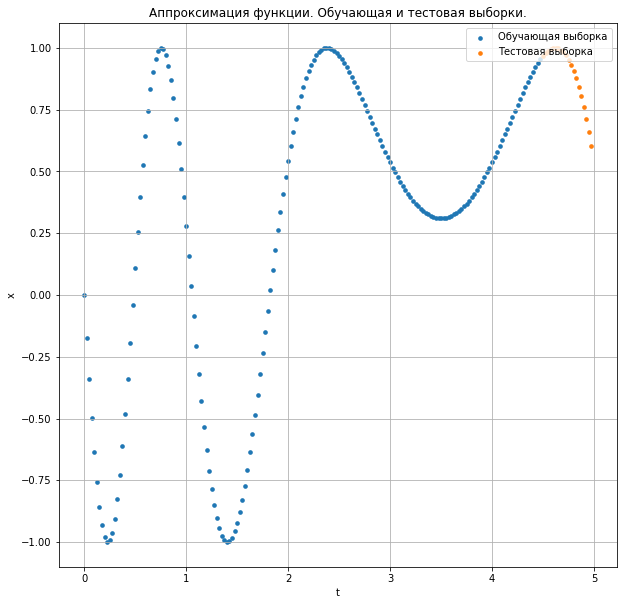

In [ ]:
plt.scatter(train_T, train_X, linewidth=2, s=7)
plt.scatter(test_T, test_X, linewidth=2, s=7)

plt.title('Аппроксимация функции. Обучающая и тестовая выборки.')
plt.ylabel('x')
plt.xlabel('t')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
n1 = np.shape(T)[0]
n2 = 1

rbf = RBF(n1, n2, T)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
dist = np.array([gaussian(dist_count(t, rbf.weights[0])) for t in train_T])

mses = multi_train(rbf, dist, train_T, train_X, 1e-2, 800)

Epoch:  1  mse:  563.9409781572792
Epoch:  2  mse:  149.93282312229505
Epoch:  3  mse:  11.606965609500996
Epoch:  4  mse:  9.094100305946284
Epoch:  5  mse:  1.7913082015570063
Epoch:  6  mse:  0.7294399517259491
Epoch:  7  mse:  0.678448162588955
Epoch:  8  mse:  0.639354316158294
Epoch:  9  mse:  0.5628138216034371
Epoch:  10  mse:  0.47240508088261995
Epoch:  11  mse:  0.38905818236674095
Epoch:  12  mse:  0.3219511608189615
Epoch:  13  mse:  0.271951530877993
Epoch:  14  mse:  0.23640582852905204
Epoch:  15  mse:  0.2118729218701137
Epoch:  16  mse:  0.19525433686745763
Epoch:  17  mse:  0.18412078180440825
Epoch:  18  mse:  0.1767005693885193
Epoch:  19  mse:  0.17175602400945483
Epoch:  20  mse:  0.1684457859585829
Epoch:  21  mse:  0.16620802834573134
Epoch:  22  mse:  0.1646719646662224
Epoch:  23  mse:  0.16359470317355376
Epoch:  24  mse:  0.16281778933829688
Epoch:  25  mse:  0.1622379897176649
Epoch:  26  mse:  0.16178795907750196
Epoch:  27  mse:  0.16142358834633241
Epoc

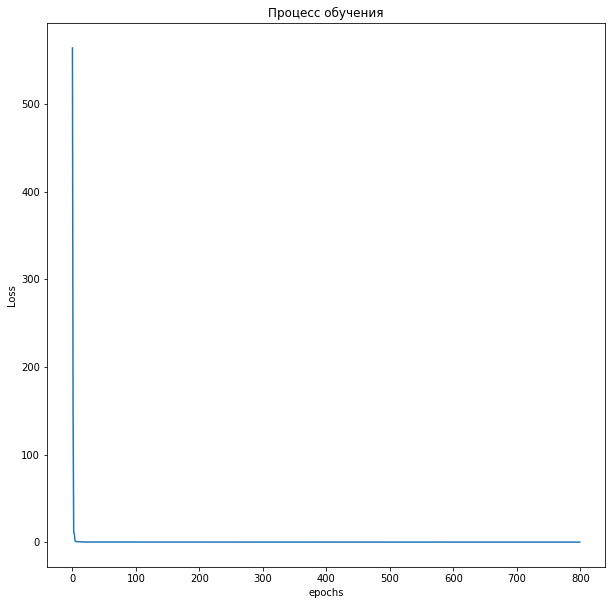

In [ ]:
plt.plot(np.array(mses))
plt.title('Процесс обучения')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.show()

In [ ]:
preds1 = np.array([predict(rbf, train_T), predict(rbf, test_T)])
print("MSE on train data: ", multi_loss(preds1[0], train_X))
print("MSE on test data: ", multi_loss(preds1[1], test_X))

MSE on train data:  0.08752126583945716
MSE on test data:  0.001947180203464333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


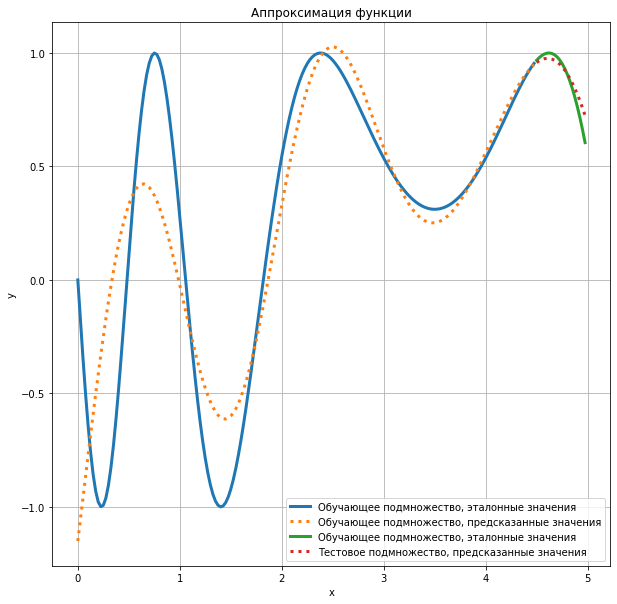

In [ ]:
plt.plot(train_T, train_X, linewidth=3)
plt.plot(train_T, preds1[0], linestyle=':', linewidth=3)

plt.plot(test_T, test_X, linewidth=3)
plt.plot(test_T, preds1[1], linestyle=':', linewidth=3)

plt.title('Аппроксимация функции')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['Обучающее подмножество, эталонные значения', 'Обучающее подмножество, предсказанные значения',
            'Обучающее подмножество, эталонные значения', 'Тестовое подмножество, предсказанные значения'])
plt.grid()
plt.show()

### Тестирование модели на рыхлых данных

In [ ]:
np.random.shuffle(T)
T = T[:100]

train_T, test_T = np.array_split(T, [ int( 0.8 * np.shape(T)[0])])
train_X, test_X = x(train_T), x(test_T)

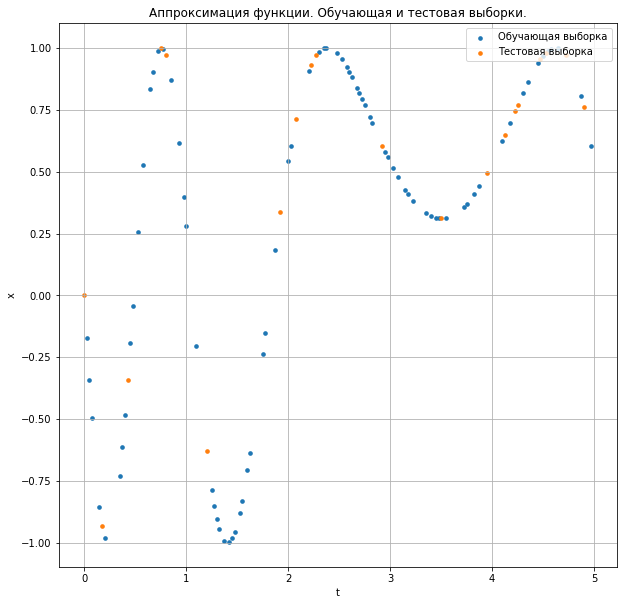

In [ ]:
plt.scatter(train_T, train_X, linewidth=2, s=7)
plt.scatter(test_T, test_X, linewidth=2, s=7)

plt.title('Аппроксимация функции. Обучающая и тестовая выборки.')
plt.ylabel('x')
plt.xlabel('t')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
n1 = np.shape(T)[0]
n2 = 1
rbf2 = RBF(n1, n2, T)

dist1 = np.array([gaussian(dist_count(t, rbf2.weights[0])) for t in train_T])
mses = multi_train(rbf2, dist1, train_T, train_X, 1e-2, 600)
print("The model is trained!")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Epoch:  1  mse:  0.3277749274358626
Epoch:  2  mse:  0.32371675712629433
Epoch:  3  mse:  0.3125209750480787
Epoch:  4  mse:  0.30098030332305126
Epoch:  5  mse:  0.2903222428857742
Epoch:  6  mse:  0.2806183766801943
Epoch:  7  mse:  0.2717822838098894
Epoch:  8  mse:  0.26371019878310564
Epoch:  9  mse:  0.2563083256734838
Epoch:  10  mse:  0.24949703920068617
Epoch:  11  mse:  0.24320949939894715
Epoch:  12  mse:  0.23738929294973313
Epoch:  13  mse:  0.2319883122381698
Epoch:  14  mse:  0.2269650888723378
Epoch:  15  mse:  0.22228353228179637
Epoch:  16  mse:  0.21791197726803663
Epoch:  17  mse:  0.21382245608645434
Epoch:  18  mse:  0.20999013214303744
Epoch:  19  mse:  0.20639285090869564
Epoch:  20  mse:  0.20301077719702681
Epoch:  21  mse:  0.19982609730298817
Epoch:  22  mse:  0.19682277083738703
Epoch:  23  mse:  0.19398632138318747
Epoch:  24  mse:  0.19130365802990718
Epoch:  25  mse:  0.18876292187081062
Epoch:  26  mse:  0.1863533529747877
Epoch:  27  mse:  0.1840651743

In [ ]:
preds2 = np.array([predict(rbf2, train_T), predict(rbf2, test_T)])
print("MSE on train data: ", multi_loss(preds2[0], train_X))
print("MSE on test data: ", multi_loss(preds2[1], test_X))

MSE on train data:  0.09586239666538786
MSE on test data:  0.17437677281016203


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


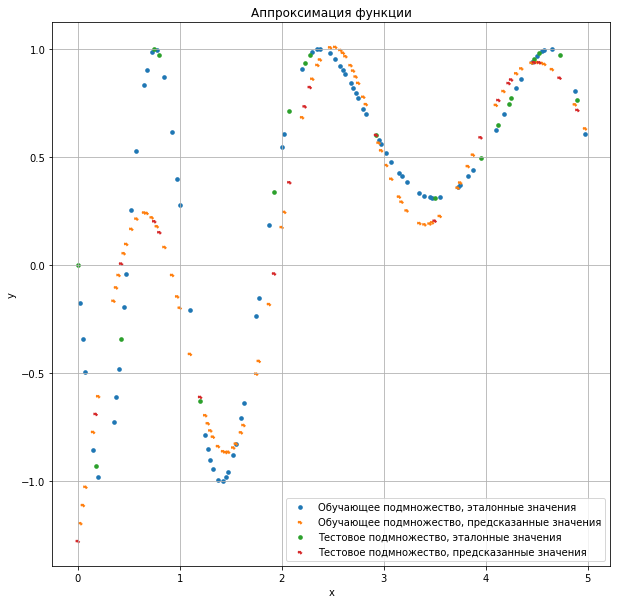

In [ ]:
plt.scatter(train_T, train_X, linewidth=2, s=7)
plt.scatter(train_T, preds2[0], linestyle=':', linewidth=2, s=7)

plt.scatter(test_T, test_X, linewidth=2, s=7)
plt.scatter(test_T, preds2[1], linestyle=':', linewidth=2, s=7)

plt.title('Аппроксимация функции')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['Обучающее подмножество, эталонные значения', 'Обучающее подмножество, предсказанные значения',
            'Тестовое подмножество, эталонные значения', 'Тестовое подмножество, предсказанные значения'])
plt.grid()
plt.show()